<center>
    <img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />
</center>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>

<HR>

> AINDA EM CRIAÇÃO... 

# Regressão linear múltipla
        Case de clientes de um banco, retirado do Kaggle em que a instituição estava querendo entender o motivo de uma alta no índice de cancelamentos
<HR>

## Objetivos:
*   Tratar paralelos e entender  possívels causas dos cancelamentos;
*   Gerar insights que possam ajudar na resolução do problema;
*   Usar a biblioteca scikit-learn para implantar um modelo de Regressão Linear Múltiplo;   
*   Criar, treinar e testar o modelo;
<HR>


<h1>Índice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href=#DF>Criando DataFrame</a></li>
        <li><a href=#Dados>Entendendo os dados</a></li>
        <li><a href=#Graf>Gráficos</a></li>
        <li><a href=#TT>Treino e teste</a></li>
        <li><a href=#Reg>Criando Modelo de regressão linear múltipla</a></li>
        <li><a href=#Pred>Predições e Avaliações</a></li>    
    </ol>
</div>
<br>
<hr>



### Importando bibliotecas e recursos pertinentes

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# <h2 id="DF">Criando DataFrame</h2>

In [15]:
df = pd.read_csv('ClientesBanco.csv', encoding='latin1')
df.head(5).T

,0,1,2,3,4
CLIENTNUM,768805383,818770008,713982108,769911858,709106358
Categoria,Cliente,Cliente,Cliente,Cliente,Cliente
Idade,45,49,51,40,40
Sexo,M,F,M,F,M
Dependentes,3,5,3,4,3
Educacao,Ensino Mï¿½dio,Ensino Superior,Ensino Superior,Ensino Mï¿½dio,Sem ensino formal
Estado_Civil,Casado,Solteiro,Casado,Nï¿½o informado,Casado
Faixa_Salarial Anual,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Categoria_Cartao,Blue,Blue,Blue,Blue,Blue
Meses_Cliente,39,44,36,34,21


## <h2 id="Dados">Entendendo os dados</h2>


### `Clientes_Banco.csv`:


Conjunto de dados **`Clientes_Banco.csv`**, Case Real, de um conjunto de dados já traduzido, referentes à clientes cartão de crédito de um banco X.


*   **CLIENTNUM** - 123456789 - **Número de identificação do cliente**
*   **Categoria** - Cliente/Cancelado - **Status de atividade**
*   **Idade** - 45 - **Idade do cliente**
*   **Sexo** - M/F
*   **Dependentes** - 3 - **Número de dependentes do cliente**
*   **Educação** - Ensino médio - **Grau de escolaridade do s**
*   **Estado_Civil** - Solteiro
*   **Faixa_Salarial Anual** - **Salário Anual**
*   **Categoria_Cartao** - Blue - **Categoria do cartão do cliente**
*   **Meses_Cliente** - 39 - **Há quanto tempo consta na base de clientes**
*   **Produtos_Contratados** - 5 - **Quantos produtos tem contratado**
*   **Inatividade_12m** - 1 - **Quanto Tempo cliente passou sem utilizar** 
*   **Contatos_12m** - 3 - **Contatos que o cliente fez no ultimo ano**
*   **Limite** - 12691.0 - **Limite total**
*   **Limite_Consumido** - 777 - **Limite utilizado**
*   **Limite_Disponivel** - 11914.0 - **Limite disponível**
*   **Mudanças Transacoes_Q4_Q1** - 1335.0 - **Valor de mudanças nas transações do quarto quadrimestre ao primeiro**
*   **Valor Transacoes 12m** - 1144 - **Valor total das transações**
*   **Qtd_Transacoes_12m1** - 1625.0 - **Mudanças na quantidade de transações do primeiro ao quarto quadrimestre**
*   **Taxa_Utz_Cartao** - 0.061 - **Taxa de utilização de 0 a 1, aonde 1 é maior**
 


Vamos agora selecionar umas características que usaremos para a regressão

## <h2 id="Graf">Gráficos</h2>

Agora vamos plotar gráficos para ter uma noção visual de se as relações entre as características dos veículos e a emissão de CO2 são lineares, pois só podemos usar este modelo de `Regressão linear múltipla` se as releções forem lineares:

> Continuarei em breve... 

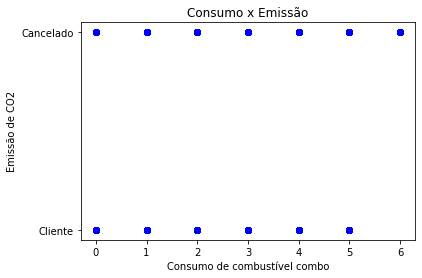